# Dual Plane Analysis

### Notebook for processing and analyzing dual plane somatic and dendritic recordings

In [ ]:
import os
import numpy as np
from Lab_Analyses.Dual_Plane.organize_dual_plane_data import organize_dual_plane_data
from Lab_Analyses.Dual_Plane.analyze_dual_plane_data import analyze_dual_plane_data
from Lab_Analyses.Dual_Plane import plot_dual_plane_data as plotting
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

### Datasets
Specify which mice to be analyzed

In [ ]:
# Mouse ids
id_1 = "JW129"
id_2 = "JW130"
id_3 = "JW152"

mouse_list = [id_1, id_2]


### Data Organization
Organize the dual plane data

In [ ]:
# Reprocess?
reprocess = True

# Inputs
data_dir = "two_plane"
file_types = {"Dendrite": "dendrite", "Soma": "soma"}

# Preprocess data
for mouse in mouse_list:
    organize_dual_plane_data(mouse_id=mouse, data_dir=data_dir, file_types=file_types, reprocess=reprocess, save=True)

### Analyze dual plane data

In [ ]:
# Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
dual_plane_dir = "Dual_Plane"
dual_plane_path = os.path.join(group_path, experiment_dir, dual_plane_dir)

# Analyze
reanalyze = True
if reanalyze:
    dual_plane_data = analyze_dual_plane_data(mouse_list, save=True, save_path=dual_plane_path)
else:
    dual_plane_data = load_pickle(["analyzed_dual_plane_data"], path=dual_plane_path)[0]

### Visualize Data

In [ ]:
# Set up figure save path
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
fig_path = os.path.join(initial_path, experiment_dir, dual_plane_dir)
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

In [ ]:
# Plot the traces
plotting.plot_soma_dend_traces(
    dual_plane_data,
    colors=["forestgreen", "black"],
    norm=False,
    subselect=None, 
    save=False, 
    save_path=fig_path,
)

In [ ]:
# Plot fraction coactivity
plotting.plot_soma_dend_coactivity(
    dual_plane_data,
    colors=["black", "forestgreen"],
    mean_type="mean", 
    err_type="sem",
    norm=False,
    trace_avg="all",
    figsize=(4,4),
    save=False,
    save_path=fig_path,
)

In [ ]:
# Plot paired event amplitudes
plotting.plot_amplitude_correlations(
    dual_plane_data,
    norm=True,
    dend_examples=[1,6],
    soma_examples=[1,6],
    color=["black", "black"],
    figsize=(11, 5.5),
    corr_lim=(0,1.2),
    s_size=25,
    s_alpha=0.8,
    bins=15,
    save=False,
    save_path=fig_path,
)

In [ ]:
from Lab_Analyses.Spine_Analysis_v2.preprocess_spine_data import organize_dual_spine_data

In [ ]:
from Lab_Analyses.Utilities.data_utilities import pad_array_to_length

In [ ]:
mouse_id = "JW130"
organize_dual_spine_data(mouse_id, channels={"GluSnFr": "GreenCh", "Calcium": "RedCh"},
    fov_type="apical",
    redetection=False,
    save=True,
    followup=True,)

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle
path = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW130\spine_data_test\FOV1_apical"
fname1 = "JW130_FOV1_apical_Early_dual_spine_data.pickle"
fname2 = "JW130_FOV1_apical_Middle_dual_spine_data.pickle"
fname3 = "JW130_FOV1_apical_Late_dual_spine_data.pickle"
files = load_pickle([fname1, fname2, fname3], path=path)

In [ ]:
f1 = files[0]
f2 = files[1]
f3 = files[2]

In [ ]:
s1 = f1.dendrite_calcium_activity
s2 = f2.dendrite_calcium_activity
s3 = f3.dendrite_calcium_activity

In [ ]:
f1.movement_spines

In [ ]:
import numpy as np
np.zeros(10).astype(bool)

In [ ]:
a = {}
b = {}
b["World"] = []
a["Hello"] = b

In [ ]:
a["Hello"]["World"] = 26

In [ ]:
a = np.array([1,2,np.nan, 3, 4, np.nan, 5])


In [ ]:
a[np.isnan(a)] = 0

In [1]:
from Lab_Analyses.Spine_Analysis_v2.spine_volume_normalization import batch_spine_volume_normalization

{'JW082': {'FOV3_apical': array([2.05829591, 2.05718664, 4.53389519, 2.39993216, 2.16512091,
         8.66368201, 1.96614647, 5.34969086, 3.07852267, 2.12861424,
         2.11478741, 3.77346301, 4.99733143, 4.22804343, 2.2613296 ,
         2.70922558, 2.18412133, 2.55322721, 4.7900176 , 2.14177934,
         2.18634661, 3.0383958 , 2.5656933 , 2.44295806, 4.02836933,
         3.45349356, 3.44289499, 2.04160502, 2.03427571, 2.11803714,
         4.18227646, 2.90143027, 2.85688289, 5.47624424, 4.82814821,
         3.32165341, 2.73166306, 2.44224913, 4.56484566, 2.20256772,
         2.68877105, 2.05863203, 2.74457764, 7.47763352])},
 'JW083': {'FOV3_apical': array([4.32639371, 3.2636731 , 2.18472436, 2.01233353, 2.83038276,
         3.35341581, 2.84582581, 2.22281521, 8.29592088, 2.77660962,
         2.40513605, 2.04829382, 2.68129515, 4.17728234, 2.28108598,
         2.51646037, 2.1122195 , 2.2598504 , 3.16036747, 2.21861236,
         2.89734107, 2.25111035, 2.10804258, 7.30078334, 2.65423

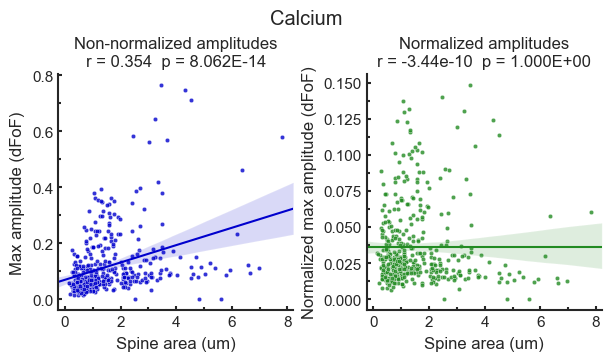

In [2]:
# Mouse ids
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW126"
id_6 = "JW129"
id_7 = "JW130"
id_8 = "JW150"

mouse_list = [id_1, id_2, id_3, id_4, id_5, id_6, id_7, id_8]

batch_spine_volume_normalization(mouse_list, "Early", "apical", "Calcium", plot=True)